# ML Lab 2 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/02_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### Note! Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/00_cheatsheet.ipynb)

# Task 2.1
_Get data from url_housing and visualize_
- Preview data, get statistics (.head(), .inf(), .describe())
- Print data histogram


_Type your code below_

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import pandas as pd


url_housing = "https://github.com/marcinsawinski/UEP_KIE_ML_CLASS/raw/main/datasets/housing/housing.csv"

In [7]:
housing = pd.read_csv(url_housing)
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [10]:
print(housing.head(), housing.info(), housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85    

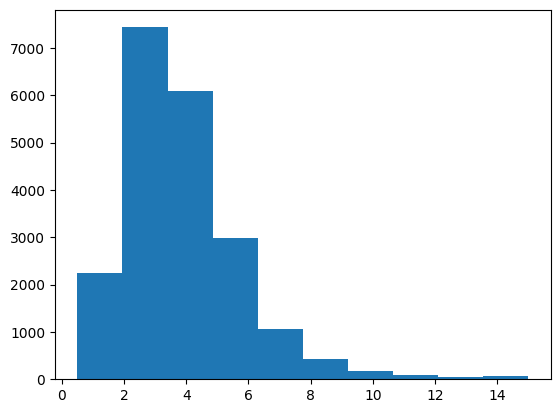

In [11]:
plt.hist(housing["median_income"])
plt.show()

# Task 2.2
_Create train / test split (80/20)_
- Create random split
- Create stratifed split on income class (5 strata)


_Type your code below_

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

strat_train_set_direct, strat_test_set_direct = train_test_split(
    housing, test_size=0.2, stratify=housing['income_cat'], random_state=42
)

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_splitter = housing.loc[train_index]
    strat_test_set_splitter = housing.loc[test_index]

print(f"Random Split: Train set size = {len(train_set)}, Test set size = {len(test_set)}")
print(f"Stratified Split (train_test_split): Train set size = {len(strat_train_set_direct)}, Test set size = {len(strat_test_set_direct)}")
print(f"Stratified Split (StratifiedShuffleSplit): Train set size = {len(strat_train_set_splitter)}, Test set size = {len(strat_test_set_splitter)}")

# Drop the income_cat column from the sets
for set_ in (strat_train_set_direct, strat_test_set_direct, strat_train_set_splitter, strat_test_set_splitter):
    set_.drop('income_cat', axis=1, inplace=True)

# For consistency with further steps, let's use the StratifiedShuffleSplit result as the primary stratified sets
strat_train_set = strat_train_set_splitter
strat_test_set = strat_test_set_splitter


Random Split: Train set size = 16512, Test set size = 4128
Stratified Split (train_test_split): Train set size = 16512, Test set size = 4128
Stratified Split (StratifiedShuffleSplit): Train set size = 16512, Test set size = 4128


/tmp/ipython-input-1576809456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)


# Task 2.3
_Visualize_
- Create plot using geographical data (lang, lat). Add alpha. Add color for median_house_value. Add size for population. OPTIONAL Add basemap (e.g. plotly.express)
- Create correlation matrix
- Plot correlation for median_income and median_house_value

_Explore_
 - Make train dataframe  copy
 - Create 3 new features:
    - rooms_per_household  = total_rooms / households,
    - bedrooms_per_room = total_bedrooms / total_rooms
    - population_per_household = population / households
- Check correlation of new features

_Type your code below_

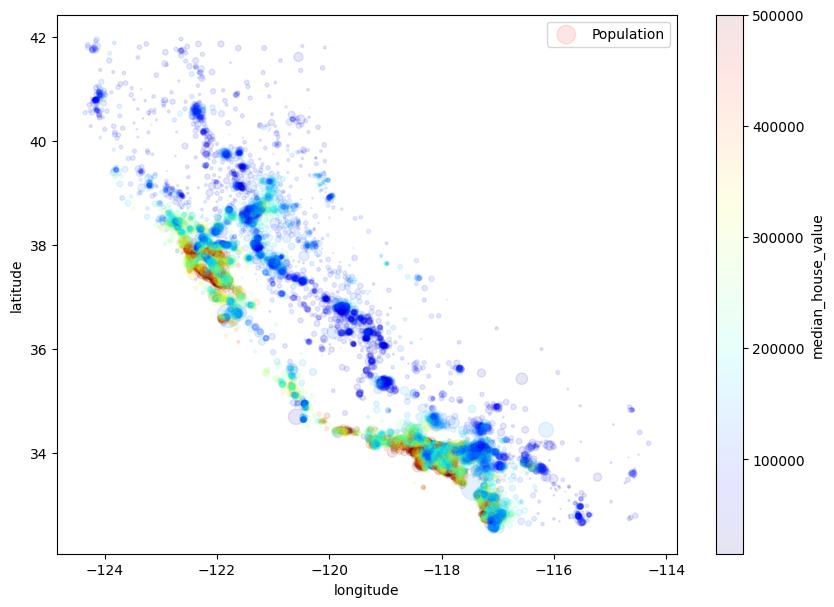

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
             s=housing["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

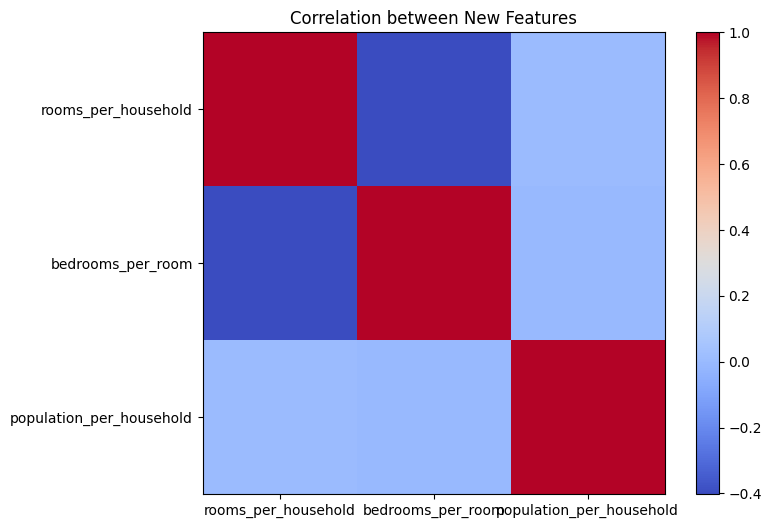

In [33]:
train_df = strat_train_set.copy()

train_df['rooms_per_household'] = train_df['total_rooms'] / train_df['households']
train_df['bedrooms_per_room'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['population_per_household'] = train_df['population'] / train_df['households']

new_features_correlation = train_df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].corr()


plt.figure(figsize=(8, 6))
plt.imshow(new_features_correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Dodanie paska kolorów
plt.title('Correlation between New Features')
plt.xticks(np.arange(len(new_features_correlation.columns)), new_features_correlation.columns)
plt.yticks(np.arange(len(new_features_correlation.columns)), new_features_correlation.columns)
plt.show()

# Task 2.4
_Prepare_
- Make train dataframe copy, drop label
- Make train dataframe copy with label only

_Clean_
 - Fill missing total_bedrooms with median value ( whe using inputer watch out for categorical features)
 - Convert categorical features into one-hot features


_Type your code below_

In [35]:
from sklearn.impute import SimpleImputer

# Make train dataframe copy, drop label
train_df_no_label = strat_train_set.drop('median_house_value', axis=1)
# Make train dataframe copy with label only
train_df_label = strat_train_set['median_house_value'].copy()

imputer = SimpleImputer(strategy='median')

# Impute missing values in total_bedrooms
train_df_no_label['total_bedrooms'] = imputer.fit_transform(train_df_no_label[['total_bedrooms']])

print(train_df_no_label.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
income_class          0
dtype: int64


In [36]:
train_df_no_label = pd.get_dummies(train_df_no_label, drop_first=True)

print(train_df_no_label.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  ocean_proximity_INLAND  \
13096      1576.0      1034.0         2.0987                   False   
14973       666.0       357.0         6.0876                   False   
3785        562.0       203.0         2.4330                    True   
14689      1845.0       780.0         2.2618                    True   
20507      1912.0      1172.0         3.5292                   False   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13096                   False    

# Task 2.5
_Clean_
- Remove outliers with Isolation forest
- Standardize numerical variables
- Try fixing distribution od population variable using:
    - log function
    - percentiles
- Add rbf measure for value 35 of housing_median_age


_Type your code below_

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

In [39]:
X = train_df_no_label.copy()
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

df_tr_no_outliers = X[outlier_pred == 1]

print(f"Original number of samples: {len(X)}")
print(f"Number of samples after outlier removal: {len(df_tr_no_outliers)}")

Original number of samples: 16512
Number of samples after outlier removal: 13814


In [42]:
scaler = StandardScaler()

numerical_cols_to_scale = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income'
]

df_tr_no_outliers[numerical_cols_to_scale] = scaler.fit_transform(df_tr_no_outliers[numerical_cols_to_scale])

print(df_tr_no_outliers.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14973   0.568300 -0.680266            0.902286    -0.219908       -0.455873   
3785   -1.317393  1.326812            0.311270    -0.985147       -1.019887   
14689   1.233530 -0.865754           -1.039622     1.696661        1.590223   
1286   -0.966444  1.136568            1.915455    -0.337904       -0.674068   
18078   0.578776 -0.818193            0.395701    -0.982544       -1.102225   

       population  households  median_income  ocean_proximity_INLAND  \
14973   -0.865055   -0.342524       1.748713                   False   
3785    -1.016894   -1.026910      -0.782680                    True   
14689    0.856280    1.537316      -0.901263                    True   
1286    -0.824175   -0.511398      -0.149866                    True   
18078   -1.094274   -1.226893       1.766515                   False   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
14973                   False    

/tmp/ipython-input-32414732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr_no_outliers[numerical_cols_to_scale] = scaler.fit_transform(df_tr_no_outliers[numerical_cols_to_scale])


In [44]:
df_tr_no_outliers['log_population'] = np.log1p(df_tr_no_outliers['population'])

print(df_tr_no_outliers[['population', 'log_population']].head())

       population  log_population
14973   -0.865055       -2.002885
3785    -1.016894             NaN
14689    0.856280        0.618574
1286    -0.824175       -1.738264
18078   -1.094274             NaN


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-382936620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr_no_outliers['log_population'] = np.log1p(df_tr_no_outliers['population'])


In [46]:
lower_percentile = df_tr_no_outliers['population'].quantile(0.01)
upper_percentile = df_tr_no_outliers['population'].quantile(0.99)

df_tr_no_outliers['population_clipped'] = df_tr_no_outliers['population'].clip(lower=lower_percentile, upper=upper_percentile)

print(df_tr_no_outliers[['population', 'population_clipped']].head())

       population  population_clipped
14973   -0.865055           -0.865055
3785    -1.016894           -1.016894
14689    0.856280            0.856280
1286    -0.824175           -0.824175
18078   -1.094274           -1.094274


/tmp/ipython-input-157117094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr_no_outliers['population_clipped'] = df_tr_no_outliers['population'].clip(lower=lower_percentile, upper=upper_percentile)


In [49]:
value_to_compare = 35

# Obliczanie RBF między każdą wartością 'housing_median_age' a wartością 35
df_tr_no_outliers['rbf_distance_35'] = rbf_kernel(
    df_tr_no_outliers[['housing_median_age']],
    np.array([[value_to_compare]]), gamma=0.1
)

# Wyświetlenie pierwszych kilku wierszy z obliczoną miarą RBF
print(df_tr_no_outliers[['housing_median_age', 'rbf_distance_35']].head())

       housing_median_age  rbf_distance_35
14973            0.902286     3.210507e-51
3785             0.311270     5.508070e-53
14689           -1.039622     3.903664e-57
1286             1.915455     2.901924e-48
18078            0.395701     9.887395e-53


/tmp/ipython-input-1150003001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr_no_outliers['rbf_distance_35'] = rbf_kernel(


# Task 2.6
_Generate custom transformations_
- add log transformer for population
- add rbf measure for value 35 of housing_median_age
- add 10 KMeans clusters
- add rooms_per_house, people_per_house, bedrooms_ratio (last one optional set by hyperparamter)

_Generate custom pipeline to combine transformations__
- pipeline for preprocessing the numerical attributes
    - median inputer
    - attributs adder
    - StandardScaler
- full pipeline witn numerical pipeline the numerical attributes and OneHotEncoder for categorical attributes

_Type your code below_

# Task 2.7
_Select and Train a Model_
- Fit LinearRegression on data prepared with full pipline. Check SME, RSME and MAE
- Fit DecisionTreeRegressor. Check RSME.
- Fit RandomForestRegressor. Check RSME.
- Fit SVR. Check RSME.
- Peforem cross validation(cv=10). Compare results

_Type your code below_

# Task 2.8
_Tune Model_
- Tune DecisionTreeRegressor with Grid Search with param grid:
```python
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
```
- Tune DecisionTreeRegressor with RandomizedSearchCV
```python
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
```
- Check scores
- Check feature importances

_Type your code below_

# Task 2.9
_Evaluate Your System on the Test Set_
- Predict result for test set with best_estimator. Check RSME.
- Calcualte 95% confidence interval for the test RMSE

_Type your code below_

# Task 2.10
Extra tasks:
- Write a full pipeline with both preparation and prediction (full_pipeline and LinearRegression)
- Calculate 10 clusters and add RBF similarities features


_Type your code below_

# Task 2.11
_Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. How does the best `SVR` predictor perform?

# Task 2.12
_Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._


# Task 2.13
_Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

# Task 2.14

_Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...


# Task 2.15
_Automatically explore some preparation options using `RandomSearchCV`._


# Task 2.16
_Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._